# R语言绘图基础

In [17]:
library(tidyverse)
library(data.table)
library(gridExtra)

In [13]:
df <- read.csv('./datasets/Facet_Data.csv')
head(df)

,age,tau,Class,SOD,male
,<dbl>,<dbl>,<fct>,<dbl>,<int>
1,0.9876238,6.297754,Control,5.609472,0
2,0.9866667,6.270988,Control,5.723585,1
3,0.9867021,6.152733,Control,5.771441,0
4,0.9871630,6.623707,Control,5.655992,0
5,0.9854651,5.740789,Control,5.509388,1
6,0.9862637,4.871603,Control,4.532599,1


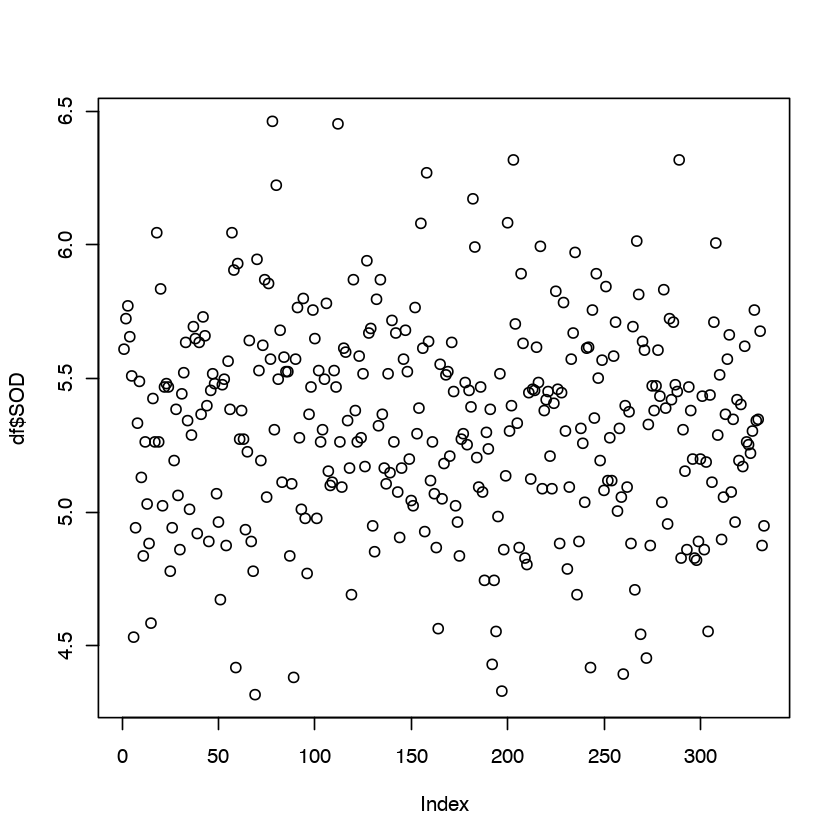

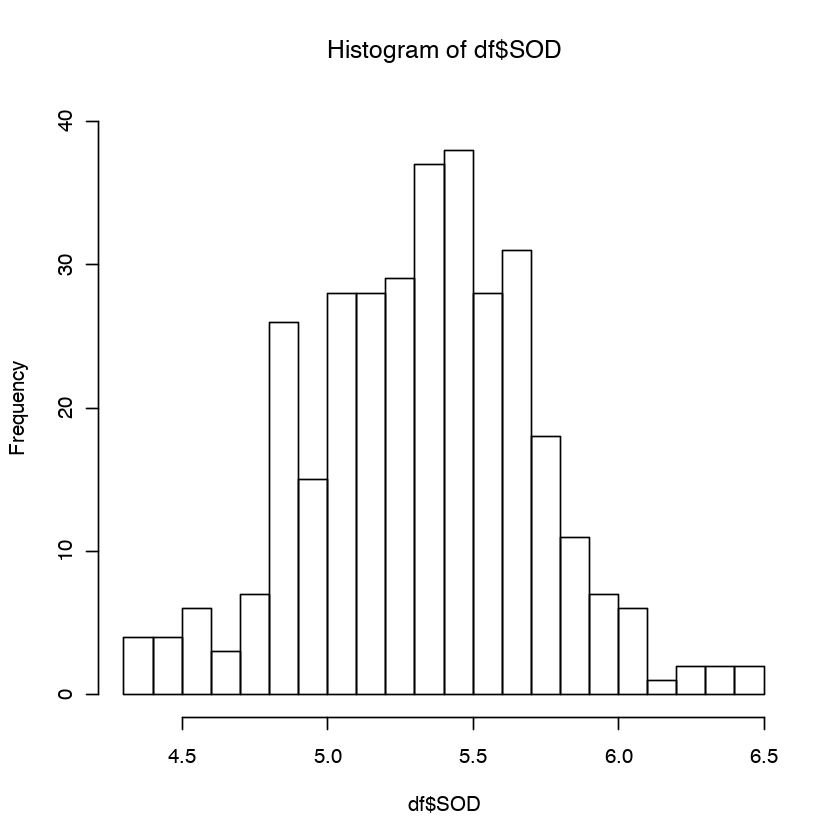

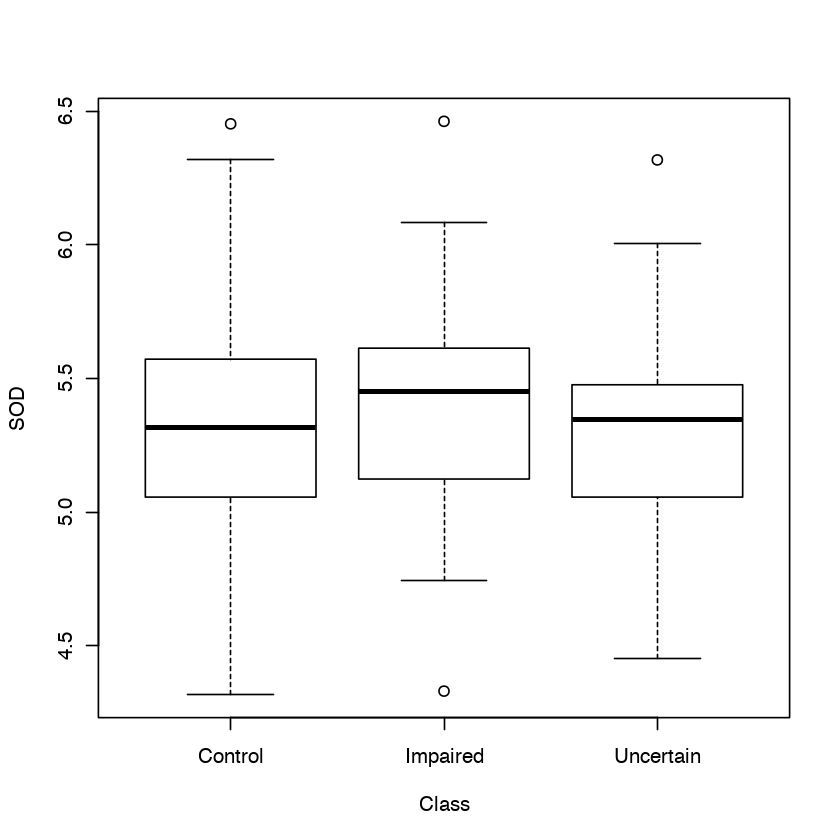

In [20]:
# 使用基础包graphics包绘制
plot(df$SOD)
hist(df$SOD, breaks=30, ylim=c(0, 40))
boxplot(SOD~Class, data=df, xlab='Class', ylab='SOD')

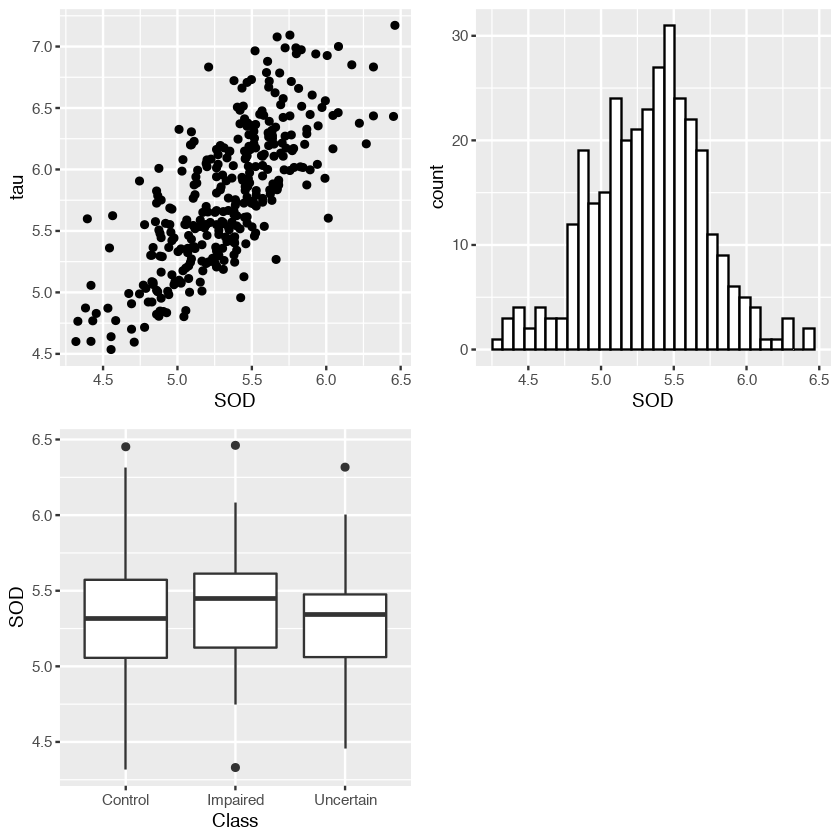

In [29]:
# 使用ggplot绘制
p1 <- ggplot(data=df, aes(x=SOD, y=tau)) + geom_point()
p2 <- ggplot(data=df, aes(x=SOD)) + geom_histogram(bins=30, colour='black', fill='white')
p3 <- ggplot(data=df, aes(x=Class, y=SOD)) + geom_boxplot()
grid.arrange(p1, p2, p3, ncol=2, nrow=2)

## 不同的都视觉通道映射效果

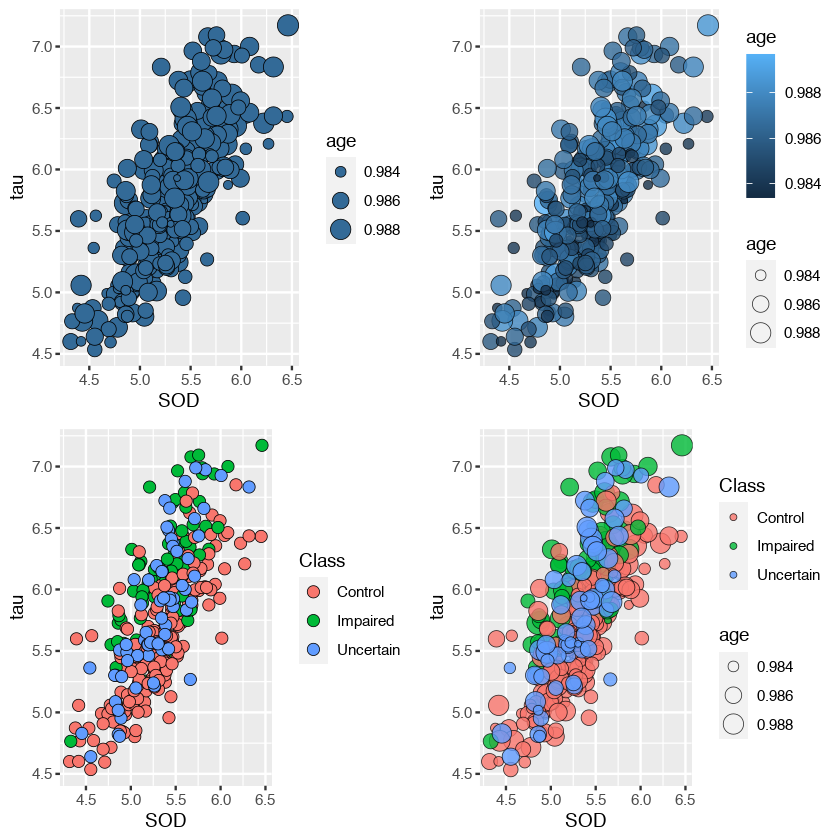

In [35]:
# 不同的视觉通道映射效果
p1 <- ggplot(data=df, aes(x=SOD, y=tau, size=age)) + geom_point(shape=21, color='black', fill='#336a97', stroke=0.25)
p2 <- ggplot(data=df, aes(x=SOD, y=tau, fill=age, size=age)) + geom_point(shape=21, color='black', stroke=0.25, alpha=0.8)
p3 <- ggplot(data=df, aes(x=SOD, y=tau, fill=Class)) + geom_point(shape=21, size=3, color='black', stroke=0.25)
p4 <- ggplot(data=df, aes(x=SOD, y=tau, fill=Class, size=age)) + geom_point(shape=21, color='black', stroke=0.25, alpha=0.8)
grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

## 不同的度量调整结果

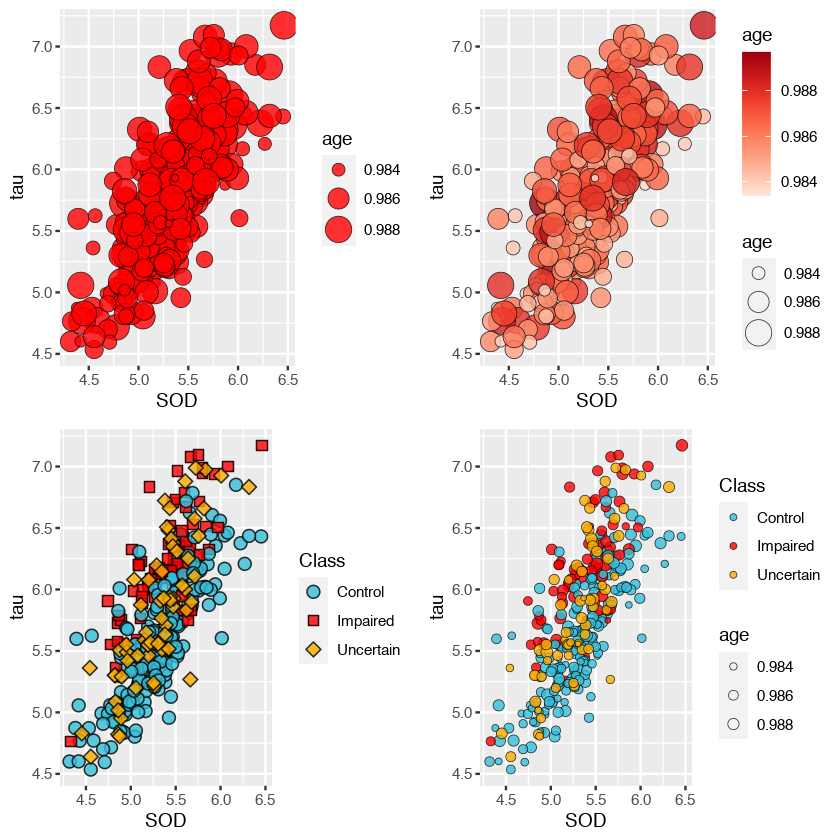

In [65]:
# 不同的度量调整效果
p1 <- ggplot(data=df, aes(x=SOD, y=tau, size=age)) + geom_point(shape=21, color='black', fill='#FF0000', alpha=0.8, stroke=0.25) + scale_size(range=c(1,8))

p2 <- ggplot(data=df, aes(x=SOD, y=tau, size=age, fill=age)) + geom_point(shape=21, color='black', alpha=0.8, stroke=0.25) + scale_size(range=c(1,8)) +
        scale_fill_distiller(palette = 'Reds', direction=0)

p3 <- ggplot(data=df, aes(x=SOD, y=tau, fill=Class, shape=Class)) + 
        geom_point(color='black', stroke=0.5, alpha=0.8, size=3) + 
        scale_fill_manual(values=c('#36bed9', '#FF0000', '#fbad01')) +
        scale_shape_manual(values=c(21, 22, 23))

p4 <- ggplot(data=df, aes(x=SOD, y=tau, fill=Class, size=age)) + 
        geom_point(shape=21, color='black', stroke=0.25, alpha=0.8) +
        scale_fill_manual(values = c("#36BED9","#FF0000","#FBAD01")) +
        scale_size(range=c(1, 3))
grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

## 不同视觉暗示的组合方法

In [3]:
df <- read.csv('./datasets/MappingAnalysis_Data.csv', header=T)
head(df)
summary(df)

,X,Time,variable,value
,<int>,<dbl>,<fct>,<dbl>
1,1,-0.04950495,0%(Control),0.0000000
2,2,0.89108911,0%(Control),0.8032129
3,3,1.88118812,0%(Control),0.8032129
4,4,3.01980198,0%(Control),0.8032129
5,5,4.10891089,0%(Control),0.4016064
6,6,5.09900990,0%(Control),4.0160643


       X              Time                 variable      value       
 Min.   : 1.00   Min.   :-0.04951   0%(Control):19   Min.   : 0.000  
 1st Qu.:19.75   1st Qu.: 4.10891   1%         :19   1st Qu.: 7.028  
 Median :38.50   Median : 8.76238   15%        :19   Median :42.169  
 Mean   :38.50   Mean   : 8.98645   5%         :19   Mean   :37.645  
 3rd Qu.:57.25   3rd Qu.:14.20792                    3rd Qu.:64.759  
 Max.   :76.00   Max.   :18.01980                    Max.   :77.912  

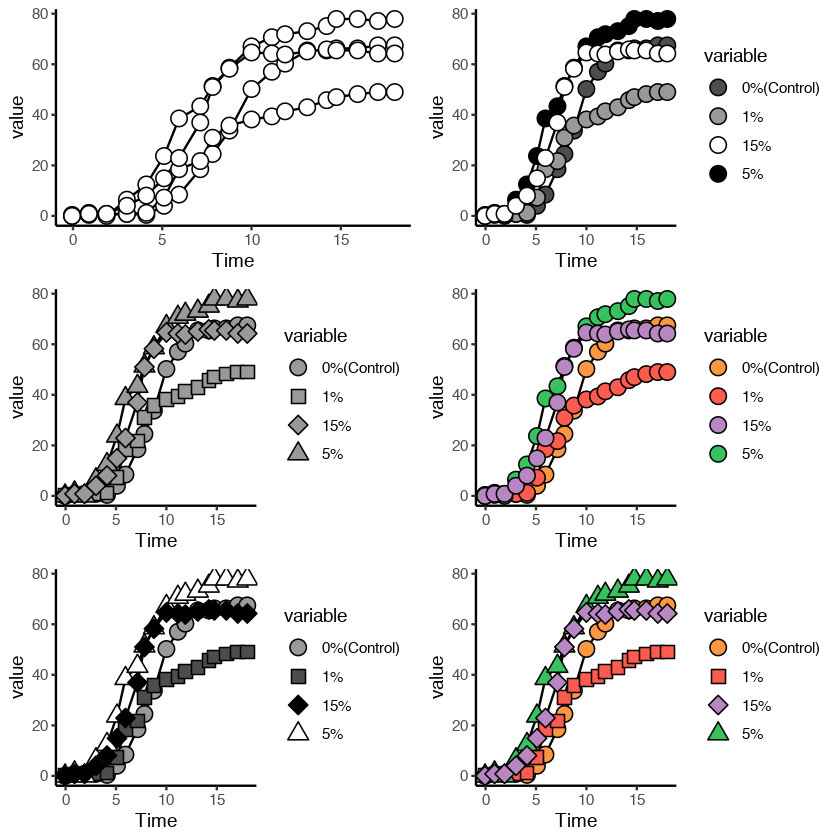

In [92]:
p1 <- ggplot(data=df, aes(x=Time,y=value,group=variable)) + 
  geom_line()+
  geom_point(shape=21,size=4,colour="black",fill="white") +
  theme_classic()

p2 <- ggplot(data=df, aes(x=Time, y=value, fill=variable)) +
  geom_line() +
  geom_point(shape=21, size=4, color='black') +
  scale_fill_manual(values=c('grey30', 'grey60', 'white', 'black')) +
  theme_classic()

p3 <- ggplot(data=df, aes(x=Time, y=value, shape=variable)) +
  geom_line() +
  geom_point(size=4, color='black', fill='grey60') +
  scale_shape_manual(values=c(21,22,23,24)) +
  theme_classic()

p4 <- ggplot(data=df, aes(x=Time, y=value, fill=variable)) +
  geom_line() +
  geom_point(shape=21, size=4, color='black') +
  scale_fill_manual(values=c("#FF9641","#FF5B4E","#B887C3","#38C25D")) +
  theme_classic()

p5 <- ggplot(data=df, aes(x=Time, y=value, fill=variable, shape=variable)) +
  geom_line() +
  geom_point(size=4, color='black') +
  scale_fill_manual(values=c("grey60","grey30","black","white")) +
  scale_shape_manual(values=c(21,22,23,24)) +
  theme_classic()

p6 <- ggplot(data=df, aes(x=Time, y=value, fill=variable, shape=variable)) +
  geom_line() +
  geom_point(size=4, color='black') +
  scale_fill_manual(values=c("#FF9641","#FF5B4E","#B887C3","#38C25D")) +
  scale_shape_manual(values=c(21,22,23,24)) +
  theme_classic()

grid.arrange(p1, p2, p3, p4, p5, p6, nrow=3, ncol=2)

## 坐标系的转换

In [16]:
df <- read.csv('./datasets/PolarBar_Data.csv', header=T)
head(df)

,Date,Value
,<int>,<int>
1,0,46
2,10,32
3,20,55
4,30,68
5,40,NA
6,50,57


Warning message:
“`expand_scale()` is deprecated; use `expansion()` instead.”
Warning message:
“Removed 5 rows containing missing values (position_stack).”
Warning message:
“Removed 5 rows containing missing values (position_stack).”


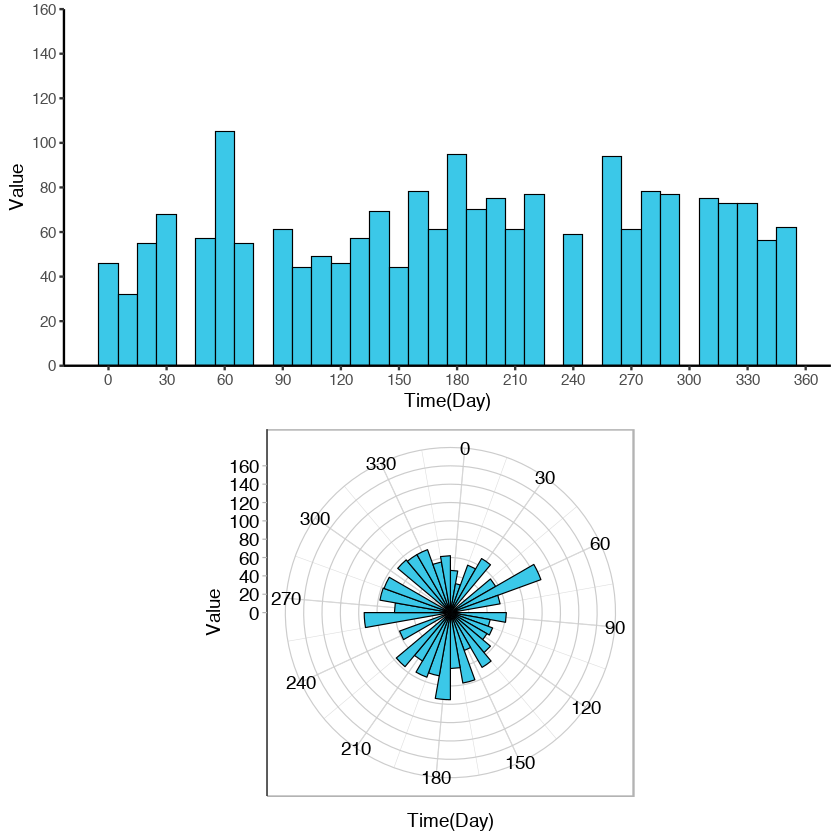

In [22]:
p1 <- ggplot(data=df, aes(x=Date, y=Value)) +
    geom_bar(stat='identity', width=10, color='black', size=0.25, fill='#3bc8e8') +
    scale_x_continuous(name='Time(Day)', breaks=seq(0, 360, 30)) +
    scale_y_continuous(breaks=seq(0, 160, 20), limits=c(0, 160), expand=expand_scale(add=0)) +
    theme_classic()

p2 <- ggplot(data=df, aes(x=Date, y=Value)) +
    geom_bar(stat='identity', width=10, color='black', size=0.25, fill='#3bc8e8') +
    scale_x_continuous(name='Time(Day)', breaks=seq(0, 360, 30)) +
    scale_y_continuous(breaks=seq(0, 160, 20), limits=c(0, 160), expand=expansion(add=0)) +
    coord_polar(theta='x', start=0) +
    theme_light() +
    theme(panel.background = element_blank(),
         panel.grid.major = element_line(colour = "grey80",size=.25),
         axis.text.y = element_text(size = 11,colour="black"),
         axis.line.y = element_line(size=0.25),
         axis.text.x=element_text(size = 11,colour="black"))

grid.arrange(p1,p2, ncol=1)

## 直角坐标系的度量的调整

In [23]:
library(RColorBrewer)
library(reshape2)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


The following object is masked from ‘package:tidyr’:

    smiths




In [25]:
df <- read.csv('./datasets/MappingAnalysis_Data.csv', header=T)
head(df)

,X,Time,variable,value
,<int>,<dbl>,<fct>,<dbl>
1,1,-0.04950495,0%(Control),0.0000000
2,2,0.89108911,0%(Control),0.8032129
3,3,1.88118812,0%(Control),0.8032129
4,4,3.01980198,0%(Control),0.8032129
5,5,4.10891089,0%(Control),0.4016064
6,6,5.09900990,0%(Control),4.0160643


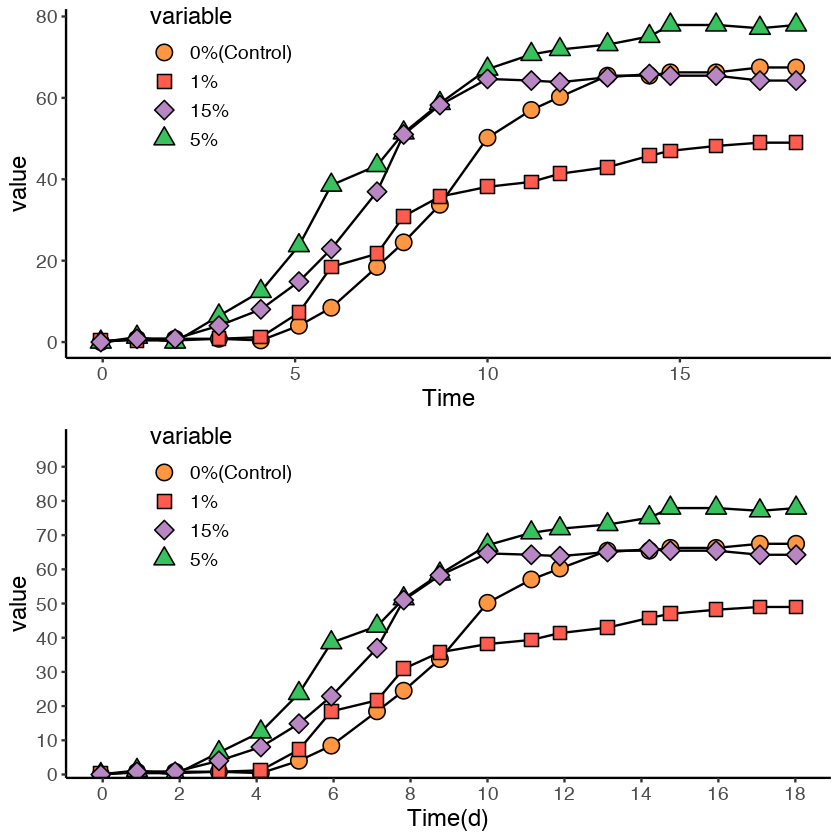

In [32]:
p1 <- ggplot(data=df, aes(x=Time, y=value, fill=variable, shape=variable)) +
    geom_line() +
    geom_point(size=4, color='black') +
    scale_fill_manual(values=c("#FF9641","#FF5B4E","#B887C3","#38C25D")) +
    scale_shape_manual(values=c(21,22,23,24)) +
    theme_classic() +
    theme(
        text=element_text(size=14, color='black'),
        plot.title=element_text(size=4, family = 'myfont', face='bold.italic', hjust=0.5, color='black'),
        legend.background=element_blank(),
        legend.position=c(0.2, 0.8)
    )


p2 <- ggplot(data=df, aes(x=Time, y=value, fill=variable, shape=variable)) +
    geom_line() +
    geom_point(size=4, color='black') +
    scale_fill_manual(values=c("#FF9641","#FF5B4E","#B887C3","#38C25D")) +
    scale_shape_manual(values=c(21,22,23,24)) +

    scale_x_continuous(name='Time(d)', breaks=seq(0, 20, 2)) +
    scale_y_continuous(breaks=seq(0, 90, 10), limits=c(0, 100), expand=c(0,1)) +

    theme_classic() +
    theme(
        text=element_text(size=14, color='black'),
        plot.title=element_text(size=4, family = 'myfont', face='bold.italic', hjust=0.5, color='black'),
        legend.background=element_blank(),
        legend.position=c(0.2, 0.8)
    )

grid.arrange(p1, p2, nrow=2)